In [1]:
import os
import numpy as np
import pandas as pd
COMMENT_PATH = 'Dataset/comments.csv'
TRANSCRIPT_FOLDER = "Dataset/Transcripts/"
INFO_PATH = "Dataset/videos.csv"
LOG_ERROR_PATH = "DataCollection/error_log.csv"
LOG_SUCCESS_PATH = "DataCollection/success_log.csv"

# 1. Clean empty file
* 清除没有comment / transcript的数据

In [2]:
comment_df = pd.read_csv(COMMENT_PATH)
info_df = pd.read_csv(INFO_PATH)

In [3]:
comment_df.describe()

,vid,uid,content,votes
count,481821,481821,481817,389255
unique,4229,236830,220950,1191
top,wlCz8nkDNqo,UgxXGMg96x9dS7ZcJut4AaABAg,❤,1
freq,480,12,769,52884


In [4]:
comment_df.shape

(481821, 4)

In [5]:
comment_df = comment_df.drop_duplicates(['uid', 'content'])

In [6]:
cleaned_info_df = info_df[info_df['vid'].isin(comment_df['vid'])]
cleaned_info_df.shape

(4410, 7)

In [7]:
# transcript 有1800+个video是空的
empty_vids = set()
for file in os.listdir(TRANSCRIPT_FOLDER):
    if file == '.DS_Store':
        continue
    with open(os.path.join(TRANSCRIPT_FOLDER, file), 'r')as f:
        lines = f.readlines()
        if len(lines) <= 5:
            vid = file.split('.')[0]
            empty_vids.add(vid)

In [8]:
cleaned_info_df = cleaned_info_df[~info_df['vid'].isin(empty_vids)]

<ipython-input-8-8912f1cf3b77>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_info_df = cleaned_info_df[~info_df['vid'].isin(empty_vids)]


In [9]:
deleted_infos = info_df[~info_df['vid'].isin(cleaned_info_df['vid'])]
deleted_infos.shape

(2523, 7)

In [10]:
cleaned_info_df.shape

(2860, 7)

In [11]:
cleaned_info_df = cleaned_info_df.drop_duplicates(['vid'])
cleaned_info_df.shape

(2740, 7)

In [12]:

cleaned_info_df.to_csv('info.csv', index=None)

## 1.2 清理空数据之后的分类结果
1. News和Education 最多，都超过300了

In [13]:
deleted_infos['tag'].value_counts()

Education        376
News             372
Vlog             231
Music            221
Fashion          218
Art              194
Sport            176
Game             171
Entertainment    161
Tech             160
Food             127
Motivation       116
Name: tag, dtype: int64

<AxesSubplot:>

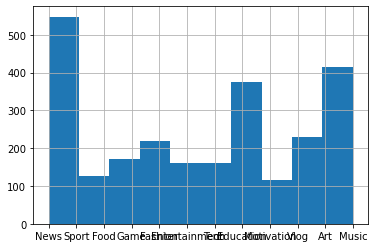

In [14]:
deleted_infos['tag'].hist()

# 2. Video Information Profile
* 每个属性的nan情况
* tag的分布
* 发布时间
* views需要处理成数据

 原来有5283个video

In [15]:
infos = pd.read_csv("info.csv")
infos.describe()

,vid,title,tag,time,duration,views,link
count,2740,2740,2740,2740,2740,2738,2740
unique,2740,2734,12,89,1481,2735,2740
top,syvOBw0JFyQ,I Went UNDERCOVER in Nick Eh 30's Fashion Show!,Tech,1 month ago,1:00,"471,298 views",https://www.youtube.com/watch?v=HMYcI90njDw
freq,1,2,306,252,25,2,1


## 2.1 duration

In [16]:
infos['duration']

0       3:11
1       8:35
2       3:46
3       1:41
4       2:41
        ... 
2735    3:27
2736    4:57
2737    3:08
2738    2:32
2739    3:42
Name: duration, Length: 2740, dtype: object

In [17]:
def trans_duration(string):
    miniute, second = string.split(':')[-2], string.split(':')[-1]
    if len(string.split(':')) == 3:
        hour = string.split(':')[0]
    else:
        hour = 0
    return (int(hour)* 3600 + int(miniute)*60 + int(second))/60
infos['duration'] = infos['duration'].apply(trans_duration)
infos['duration'].describe()

count    2740.000000
mean       18.942701
std        35.841803
min         0.216667
25%         6.083333
50%        11.500000
75%        19.450000
max       801.566667
Name: duration, dtype: float64

In [18]:
infos = infos[infos['duration'] < 20]
infos.describe()

,duration
count,2086.000000
mean,9.254666
std,5.196186
min,0.216667
25%,4.583333
50%,9.116667
75%,13.262500
max,19.983333


## 2.2 views

In [19]:
infos.views

0          143,423 views
1        1,129,023 views
2           73,366 views
3          122,448 views
4          309,045 views
              ...       
2735         1,261 views
2736       806,112 views
2737    37,929,473 views
2738     1,095,318 views
2739       335,583 views
Name: views, Length: 2086, dtype: object

In [20]:
def trans_views(string):
    try:
        return int(string.strip('views').replace(',',''))/10000
    except:
        return 
infos['view_10k'] = infos['views'].apply(trans_views)

In [21]:
infos['view_10k']

0         14.3423
1        112.9023
2          7.3366
3         12.2448
4         30.9045
          ...    
2735       0.1261
2736      80.6112
2737    3792.9473
2738     109.5318
2739      33.5583
Name: view_10k, Length: 2086, dtype: float64

array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'view_10k'}>]], dtype=object)

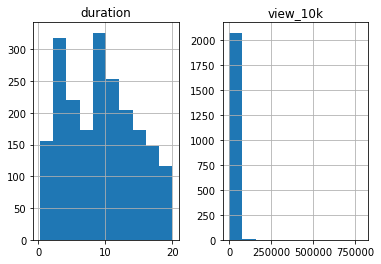

In [22]:
infos.hist()

In [23]:
infos.to_csv('new_infos.csv', index = None)

In [24]:
infos = pd.read_csv("new_infos.csv")
infos.head()

,vid,title,tag,time,duration_min,views,link,view_10k
0,tZa4hs1MY3Y,Secret Service pushes back on allegations in r...,News,1 day ago,3.183333,"143,423 views",https://www.youtube.com/watch?v=tZa4hs1MY3Y,14.3423
1,oOcZRxBwZ1k,Trump Coup Nightmare: See The Moment Fox News ...,News,15 hours ago,8.583333,"1,129,023 views",https://www.youtube.com/watch?v=oOcZRxBwZ1k,112.9023
2,jLkqmXmkVkE,Putin warns after Finland and Sweden invited t...,News,15 hours ago,3.766667,"73,366 views",https://www.youtube.com/watch?v=jLkqmXmkVkE,7.3366
3,t2nu91KU25g,Biden loses Supreme Court ruling as court rein...,News,1 hour ago,1.683333,"122,448 views",https://www.youtube.com/watch?v=t2nu91KU25g,12.2448
4,tSJf6KEC5qc,India state on alert after Prophet Muhammad ro...,News,23 hours ago,2.683333,"309,045 views",https://www.youtube.com/watch?v=tSJf6KEC5qc,30.9045


## 2. Comment

In [177]:
comments = pd.read_csv('Dataset/comments.csv')
comments.head()

,vid,uid,content,votes
0,tZa4hs1MY3Y,UgxDRq2kfKKUdlLpBZl4AaABAg,I would be shocked if the committee hasn't alr...,170.0
1,tZa4hs1MY3Y,Ugxove78337i20X3u614AaABAg,My favorite part of the hearing was at the end:,2.0
2,tZa4hs1MY3Y,UgxOhb_QtgvMJ8Age_B4AaABAg,Her position within the west wing was specific...,4.0
3,tZa4hs1MY3Y,UgwSx3EZ9UZXPwroBB54AaABAg,"""Too good to verify"" as they say in the ABC, N...",6.0
4,tZa4hs1MY3Y,Ugz1NKYar4WApnMFHyd4AaABAg,Her “hear say” testimony would never be allowe...,1.0


In [178]:
comments.describe()

,votes
count,238443.000000
mean,248.606761
std,3432.461400
min,0.000000
25%,1.000000
50%,4.000000
75%,23.000000
max,855000.000000


## 2.1 检查重复情况
超过一半重复

In [179]:
comments.shape

(238482, 4)

In [118]:
comments = comments.drop_duplicates()
comments.shape

(238482, 4)

In [120]:
comments.to_csv(COMMENT_PATH, index=None)

## 2.2  检查平均每个vid有几个评论
1. vid一共4229个
2. mean = 56条评论
3. 大部分都是60条

[x] 是否需要处理大部分60条，分布太均匀的问题？  

In [121]:
comments['vid'].value_counts().describe()

count    4240.000000
mean       56.245755
std        12.173414
min         1.000000
25%        60.000000
50%        60.000000
75%        60.000000
max       109.000000
Name: vid, dtype: float64

<AxesSubplot:>

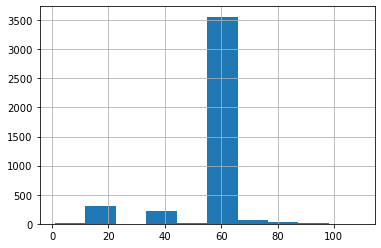

In [122]:
comments['vid'].value_counts().hist()

## 2.3 uid 数据
一共236830个评论，大多数评论都只出现了一次

In [123]:
comments['uid'].value_counts().describe()

count    236839.000000
mean          1.006929
std           0.083103
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: uid, dtype: float64

<AxesSubplot:>

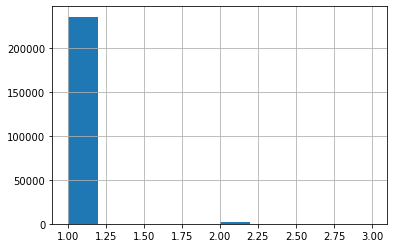

In [132]:
comments.uid.value_counts().hist()

## 2.4 comment votes

In [136]:
comments.votes

0         170.0
1           2.0
2           4.0
3           6.0
4           1.0
          ...  
238477      0.0
238478      0.0
238479      0.0
238480      8.0
238481     15.0
Name: votes, Length: 238482, dtype: float64

In [126]:
# 处理votes
def trans_votes(string):
    if isinstance(string, str):
        if 'k' == string[-1].lower():
            return float(string[:-1])*1000
        return float(string)
comments['votes'] = comments['votes'].fillna('0')
comments['votes'] = comments['votes'].apply(trans_votes)


<AxesSubplot:>

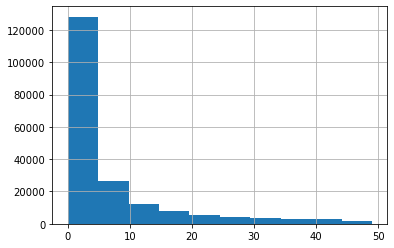

In [140]:
comments[comments.votes<50]['votes'].hist()

## 2.5 content

In [180]:
comments = comments.dropna(subset=['content'])

In [181]:
comments.shape

(238468, 4)

In [190]:
import re
pattern = re.compile('^[A-Za-z0-9.,:;!?()_*"“”\'’ ]+$')
texts = list(comments['content'])
def filter_str(desstr, restr=''):
    res = re.compile("^[a-zA-Z0-9].,:;!?()_*\"' ")
    return res.sub(restr, desstr)
comments['english_content'] = comments['content'].apply(filter_str)

In [188]:
comments.iloc[261]['content']

'Watch - స్కూల్స్ లో ఇలాంటి భయంకరమైన వింత నియమాలు'

In [200]:
res = re.compile("[^a-z^A-Z^0-9^.^,^:^;^!^?^(^)^_^*^\"^' ]")
a = res.sub('', 'Watch - స్కూల్స్ లో ఇలాంటి భయంకరమైన వింత నియమాలు')
a

'Watch       '

In [185]:
comments.head()

,vid,uid,content,votes,english_content
0,tZa4hs1MY3Y,UgxDRq2kfKKUdlLpBZl4AaABAg,I would be shocked if the committee hasn't alr...,170.0,I would be shocked if the committee hasn't alr...
1,tZa4hs1MY3Y,Ugxove78337i20X3u614AaABAg,My favorite part of the hearing was at the end:,2.0,My favorite part of the hearing was at the end:
2,tZa4hs1MY3Y,UgxOhb_QtgvMJ8Age_B4AaABAg,Her position within the west wing was specific...,4.0,Her position within the west wing was specific...
3,tZa4hs1MY3Y,UgwSx3EZ9UZXPwroBB54AaABAg,"""Too good to verify"" as they say in the ABC, N...",6.0,"""Too good to verify"" as they say in the ABC, N..."
4,tZa4hs1MY3Y,Ugz1NKYar4WApnMFHyd4AaABAg,Her “hear say” testimony would never be allowe...,1.0,Her “hear say” testimony would never be allowe...


In [186]:
comments.to_csv('comments.csv', index = None)